In [78]:
import pandas as pd

In [79]:
### The datetime data type

from datetime import datetime
now = datetime.now()
now

datetime.datetime(2024, 2, 1, 7, 9, 43, 678923)

## Conversions limitations

1. Try to convert a invalid string will be raise a KeyError
2. If ignore the error, the invalid string will be converted to NaT (Not a Time) or Object
3. pd.to_datetime() is more flexible => Erros => NaT, but the format will be datetime64[ns]



In [80]:
retail = pd.read_csv('../retail/retail_2016_2017.csv')
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [81]:
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1054944 non-null  int64  
 1   date         1054944 non-null  object 
 2   store_nbr    1054944 non-null  int64  
 3   family       1054944 non-null  object 
 4   sales        1054944 non-null  float64
 5   onpromotion  1054944 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 167.8 MB


In [82]:
retail = retail.astype({'date': 'datetime64[ns]'})
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


In [83]:
retail = pd.read_csv('../retail/retail_2016_2017.csv')
retail.loc[0, ['date']] = 'N/A'
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,N/A,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [84]:
retail.shape

(1054944, 6)

In [85]:
# retail = retail.astype({'date': 'datetime64[ns]'})

## BOOM, Error!

In [86]:
retail = retail.assign(date=pd.to_datetime(
    retail['date'], 
    infer_datetime_format=True, 
    errors='coerce')
)

/var/folders/z1/zt4b5v_n0yb49qxq46y1gp080000gn/T/ipykernel_1165/3976323099.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  retail = retail.assign(date=pd.to_datetime(
/var/folders/z1/zt4b5v_n0yb49qxq46y1gp080000gn/T/ipykernel_1165/3976323099.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail = retail.assign(date=pd.to_datetime(


In [87]:
retail.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dtype: object

In [88]:
retail.shape

(1054944, 6)

In [89]:
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054943 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


### DATETIME CODES

In [90]:
now

datetime.datetime(2024, 2, 1, 7, 9, 43, 678923)

In [91]:
now.strftime('%B %d, %Y')

'February 01, 2024'

In [92]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


In [93]:
retail['date'].dt.strftime('%Y').head()

0    2016
1    2016
2    2016
3    2016
4    2016
Name: date, dtype: object

In [94]:
retail['date'].dt.strftime('%y-%b,%d').head()

0    16-Jan,01
1    16-Jan,01
2    16-Jan,01
3    16-Jan,01
4    16-Jan,01
Name: date, dtype: object

In [95]:
### Extracting datetime components
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054944 entries, 0 to 1054943
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 108.4 MB


In [96]:
retail = retail.assign(
    year=retail['date'].dt.year,
    month=retail['date'].dt.month,
    day=retail['date'].dt.day,
    day_of_week=retail['date'].dt.dayofweek,
    hour=retail['date'].dt.hour,
    minute=retail['date'].dt.minute,
    second=retail['date'].dt.second
)
retail.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week,hour,minute,second
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,2016,1,1,4,0,0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0,2016,1,1,4,0,0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0,2016,1,1,4,0,0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,2016,1,1,4,0,0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0,2016,1,1,4,0,0,0


In [97]:
retail.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
year                    int32
month                   int32
day                     int32
day_of_week             int32
hour                    int32
minute                  int32
second                  int32
dtype: object

# Assignment 1: Date Formats and Date Parts

* First, convert the `date` column to datetime64, by any method.

* Then, create a column representing the time difference between the last date in the data and each date. 

* Next, create columns for the date parts year, month, and weekday.

* Finally, format the date to Year-Month-Day (This will be a string/object).

In [98]:
# read in transactions.csv 
retail = pd.read_csv(
    '../retail/retail_2016_2017.csv', parse_dates=['date']
)
major_date = retail.loc[:, 'date'].max()
retail = retail.assign(
    days_since=major_date - retail['date'],
    year=retail['date'].dt.year,
    month=retail['date'].dt.month,    
    day_of_week=retail['date'].dt.dayofweek
)
retail.head()


,id,date,store_nbr,family,sales,onpromotion,days_since,year,month,day_of_week
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,592 days,2016,1,4
1,1945945,2016-01-01,1,BABY CARE,0.0,0,592 days,2016,1,4
2,1945946,2016-01-01,1,BEAUTY,0.0,0,592 days,2016,1,4
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,592 days,2016,1,4
4,1945948,2016-01-01,1,BOOKS,0.0,0,592 days,2016,1,4


In [99]:
retail['date'] = retail['date'].dt.strftime('%Y-%B-%d')

In [100]:
retail.head()

,id,date,store_nbr,family,sales,onpromotion,days_since,year,month,day_of_week
0,1945944,2016-January-01,1,AUTOMOTIVE,0.0,0,592 days,2016,1,4
1,1945945,2016-January-01,1,BABY CARE,0.0,0,592 days,2016,1,4
2,1945946,2016-January-01,1,BEAUTY,0.0,0,592 days,2016,1,4
3,1945947,2016-January-01,1,BEVERAGES,0.0,0,592 days,2016,1,4
4,1945948,2016-January-01,1,BOOKS,0.0,0,592 days,2016,1,4


### TIME DELTAS

In [101]:
retail = pd.read_csv(
    '../retail/retail_2016_2017.csv', parse_dates=['date']
)
retail.head(), retail.memory_usage(deep=True)

(        id       date  store_nbr      family  sales  onpromotion
 0  1945944 2016-01-01          1  AUTOMOTIVE    0.0            0
 1  1945945 2016-01-01          1   BABY CARE    0.0            0
 2  1945946 2016-01-01          1      BEAUTY    0.0            0
 3  1945947 2016-01-01          1   BEVERAGES    0.0            0
 4  1945948 2016-01-01          1       BOOKS    0.0            0,
 Index               132
 id              8439552
 date            8439552
 store_nbr       8439552
 family         71480448
 sales           8439552
 onpromotion     8439552
 dtype: int64)

In [102]:
retail = retail.assign(
    birthday=pd.to_datetime('1950-01-01', format='%Y-%m-%d')
)
retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01


In [103]:
retail = retail.assign(
    age=retail['date'] - retail['birthday']
)
retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,24106 days
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,24106 days
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,24106 days
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,24106 days
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,24106 days


In [104]:
retail = retail.assign(
    age=(retail['date'] - retail['birthday']).dt.days / 365.25
)
retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,65.998631
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,65.998631
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,65.998631
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,65.998631
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,65.998631


In [105]:
retail = retail.assign(
    retirement_date=(retail['date'] + (pd.to_timedelta(365.25, unit='D') * 20))
)
retail.head()

,id,date,store_nbr,family,sales,onpromotion,birthday,age,retirement_date
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0,1950-01-01,65.998631,2036-01-01
1,1945945,2016-01-01,1,BABY CARE,0.0,0,1950-01-01,65.998631,2036-01-01
2,1945946,2016-01-01,1,BEAUTY,0.0,0,1950-01-01,65.998631,2036-01-01
3,1945947,2016-01-01,1,BEVERAGES,0.0,0,1950-01-01,65.998631,2036-01-01
4,1945948,2016-01-01,1,BOOKS,0.0,0,1950-01-01,65.998631,2036-01-01


# Assignment 2: Time Arithmetic


Hi again,

I just got word the the true max date in our data was three weeks after 2017-08-15.

* Can you add three weeks to the ‘time_to_last_date’ column? 
* Then, calculate ‘weeks_to_last_date’ by dividing the number of days  in ‘time_to_last_date’ by 7.

Thanks

In [112]:
# overwrite previous transactions df and convert date column

transactions = pd.read_csv("../retail/transactions.csv", parse_dates=["date"])
transactions = transactions.assign(
    year=transactions["date"].dt.year,
    month=transactions["date"].dt.month,
    day_of_week=transactions["date"].dt.dayofweek,
    time_to_last_date=transactions["date"].max() - transactions["date"],
)
transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days
1,2013-01-02,1,2111,2013,1,2,1686 days
2,2013-01-02,2,2358,2013,1,2,1686 days
3,2013-01-02,3,3487,2013,1,2,1686 days
4,2013-01-02,4,1922,2013,1,2,1686 days


In [113]:
transactions = transactions.assign(
    time_to_last_date = transactions['time_to_last_date'] + pd.to_timedelta(3, unit='W'),
    weeks_to_last_date = (lambda x: x['time_to_last_date'].dt.days / 7)
)

In [114]:
transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1708 days,244.000000
1,2013-01-02,1,2111,2013,1,2,1707 days,243.857143
2,2013-01-02,2,2358,2013,1,2,1707 days,243.857143
3,2013-01-02,3,3487,2013,1,2,1707 days,243.857143
4,2013-01-02,4,1922,2013,1,2,1707 days,243.857143


### TIME SERIES INDICES

In [115]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [116]:
retail.index = retail['date']

In [117]:
retail.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1054944 entries, 2016-01-01 to 2017-08-15
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   id           1054944 non-null  int64         
 1   date         1054944 non-null  datetime64[ns]
 2   store_nbr    1054944 non-null  int64         
 3   family       1054944 non-null  object        
 4   sales        1054944 non-null  float64       
 5   onpromotion  1054944 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 116.5 MB


In [118]:
retail.drop(columns='date', inplace=True)
retail.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2016-01-01,1945944,1,AUTOMOTIVE,0.0,0
2016-01-01,1945945,1,BABY CARE,0.0,0
2016-01-01,1945946,1,BEAUTY,0.0,0
2016-01-01,1945947,1,BEVERAGES,0.0,0
2016-01-01,1945948,1,BOOKS,0.0,0


In [119]:
retail.loc['2017-08']

,id,store_nbr,family,sales,onpromotion
date,,,,,
2017-08-01,2974158,1,AUTOMOTIVE,5.000,0
2017-08-01,2974159,1,BABY CARE,0.000,0
2017-08-01,2974160,1,BEAUTY,4.000,0
2017-08-01,2974161,1,BEVERAGES,2627.000,26
2017-08-01,2974162,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


In [120]:
retail.loc['2016-08':'2017-08-15']

,id,store_nbr,family,sales,onpromotion
date,,,,,
2016-08-01,2325510,1,AUTOMOTIVE,3.000,0
2016-08-01,2325511,1,BABY CARE,0.000,0
2016-08-01,2325512,1,BEAUTY,3.000,0
2016-08-01,2325513,1,BEVERAGES,2418.000,10
2016-08-01,2325514,1,BOOKS,0.000,0
...,...,...,...,...,...
2017-08-15,3000883,9,POULTRY,438.133,0
2017-08-15,3000884,9,PREPARED FOODS,154.553,1
2017-08-15,3000885,9,PRODUCE,2419.729,148


### MISSING TIME SERIES DATA

In [121]:
retail_agg = retail.groupby(['date']).agg({'sales': 'sum'}).round(2).iloc[:10]

In [122]:
import numpy as np

retail_agg.iloc[1] = np.NaN
retail_agg.iloc[4:6] = np.NaN
retail_agg

,sales
date,
2016-01-01,16433.39
2016-01-02,NaN
2016-01-03,1226735.72
2016-01-04,955956.88
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,653504.37
2016-01-08,713608.33
2016-01-09,989209.46


<Axes: xlabel='date'>

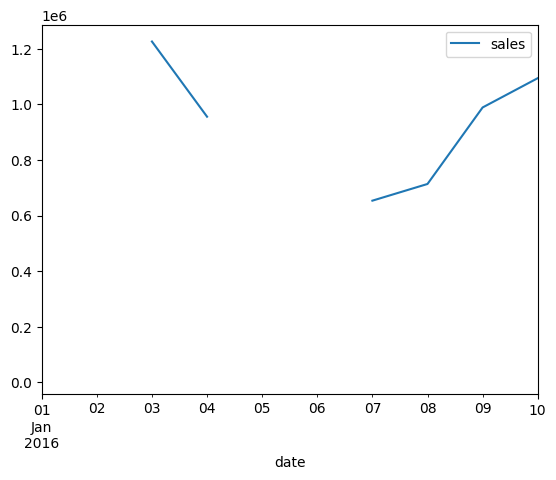

In [123]:
retail_agg.plot()

<Axes: xlabel='date'>

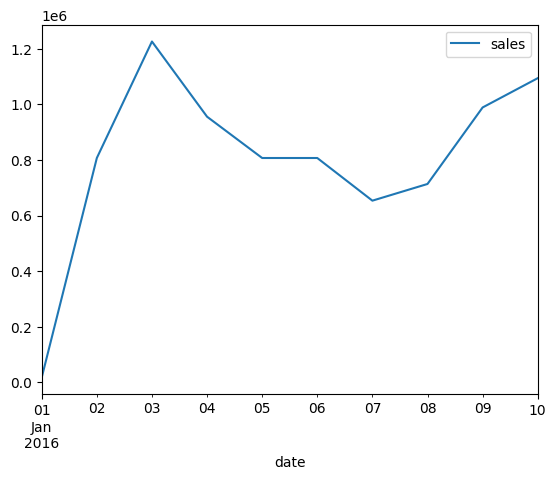

In [124]:
retail_agg.fillna(retail_agg['sales'].mean()).plot()

/var/folders/z1/zt4b5v_n0yb49qxq46y1gp080000gn/T/ipykernel_1165/105692372.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  retail_agg.fillna(method='ffill').plot();


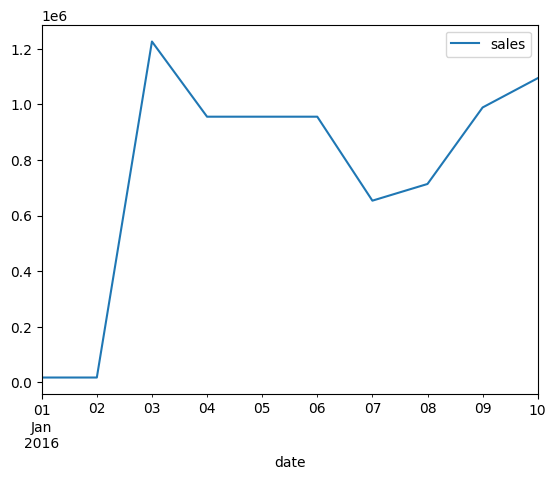

In [125]:
retail_agg.fillna(method='ffill').plot();

<Axes: xlabel='date'>

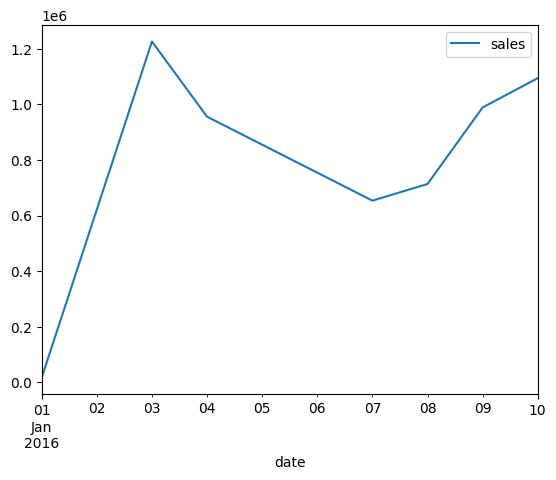

In [126]:
retail_agg.interpolate().plot()

# Assignment 3: Missing Time Series Data

Take a look at the mean value for the oil price using forward fill, backfill, and interpolation. Are they very different?

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


In [127]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv("../retail/oil.csv", 
                  index_col="date", 
                  parse_dates=True)

In [128]:
# This is a synonym for datetime64
oil.index.dtype

dtype('<M8[ns]')

In [129]:
# mean of original series
oil.mean(), oil.fillna(method='ffill').mean(), oil.fillna(method='bfill').mean(), oil.interpolate().mean()

/var/folders/z1/zt4b5v_n0yb49qxq46y1gp080000gn/T/ipykernel_1165/3953159591.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  oil.mean(), oil.fillna(method='ffill').mean(), oil.fillna(method='bfill').mean(), oil.interpolate().mean()


(dcoilwtico    67.714366
 dtype: float64,
 dcoilwtico    67.671249
 dtype: float64,
 dcoilwtico    67.673325
 dtype: float64,
 dcoilwtico    67.661824
 dtype: float64)

<Axes: xlabel='date'>

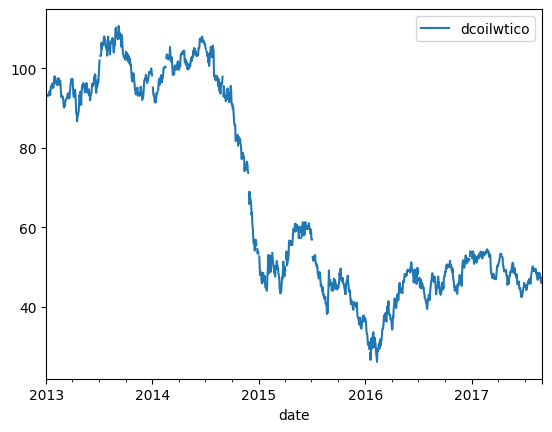

In [130]:
# original plot
oil.plot()

In [131]:
(oil.isna().sum() / oil.shape[0] * 100).round(2)

dcoilwtico    3.53
dtype: float64

In [132]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


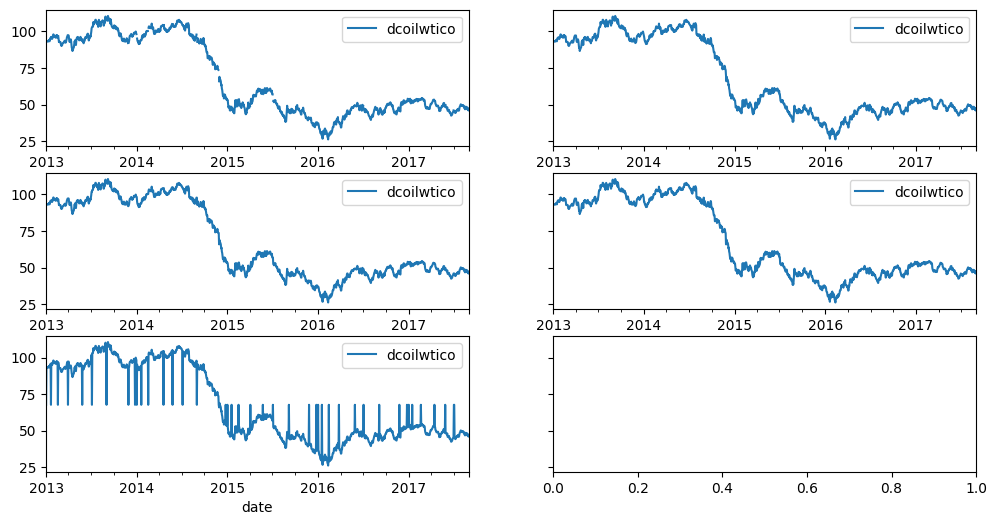

In [133]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 2, figsize=(12, 6), sharey=True)
oil.plot(ax=ax[0, 0])
oil.interpolate().plot(ax=ax[0, 1])
oil.ffill().plot(ax=ax[1, 0])
oil.bfill().plot(ax=ax[1, 1])
oil.fillna(oil.mean()).plot(ax=ax[2, 0])
plt.show();

<Axes: xlabel='date'>

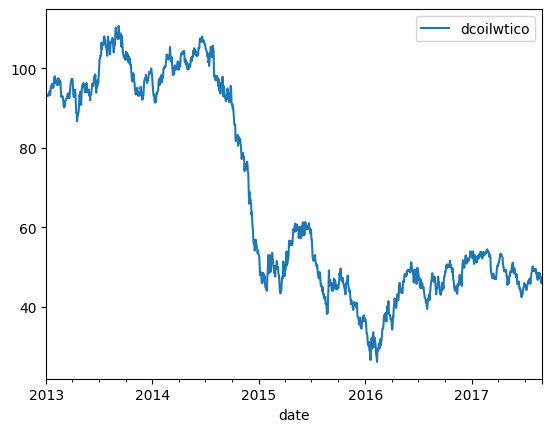

In [134]:
## Fill the values:
oil.interpolate().plot()

Then, plot the series with forward fill for:
 * The year 2014.
 * The month of December 2014.
 * The days from December 1st to December 15th, 2014.


<Axes: xlabel='date'>

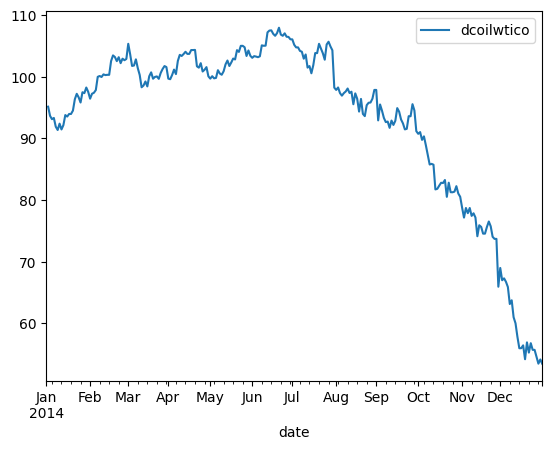

In [135]:
oil.loc['2014'].ffill().plot()

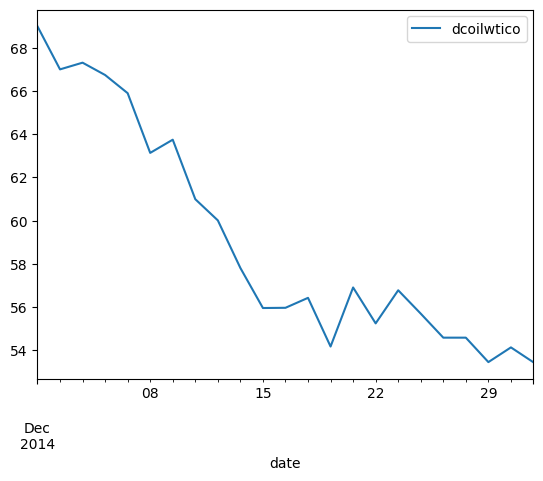

In [136]:
oil.loc['2014-12'].bfill().plot();

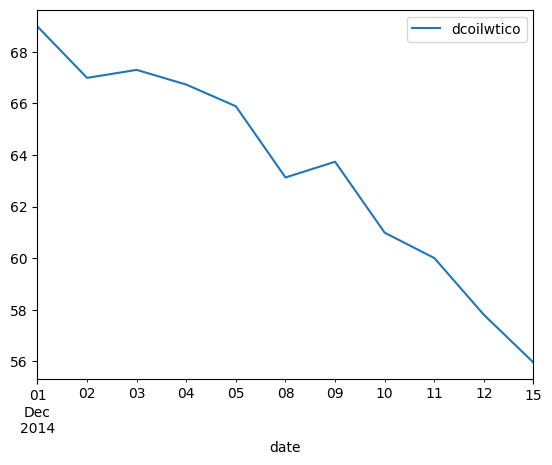

In [137]:
oil.loc['2014-12-01':'2014-12-15'].fillna(oil.mean()).plot();

## SHIFTING SERIES
> Bem importante

In [138]:
import pandas as pd
import numpy as np

In [139]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [140]:
retail_agg = retail.groupby(['date']).agg({'sales': 'sum'}).round(2).iloc[1:10]
retail_agg

,sales
date,
2016-01-02,1066677.42
2016-01-03,1226735.72
2016-01-04,955956.88
2016-01-05,835320.44
2016-01-06,821685.66
2016-01-07,653504.37
2016-01-08,713608.33
2016-01-09,989209.46
2016-01-10,1094693.84


In [141]:
retail_agg.assign(
    yesterday_sales = retail_agg['sales'] / retail_agg['sales'].shift(),
)

,sales,yesterday_sales
date,,
2016-01-02,1066677.42,NaN
2016-01-03,1226735.72,1.150053
2016-01-04,955956.88,0.779269
2016-01-05,835320.44,0.873806
2016-01-06,821685.66,0.983677
2016-01-07,653504.37,0.795322
2016-01-08,713608.33,1.091972
2016-01-09,989209.46,1.386208
2016-01-10,1094693.84,1.106635


## PRO TIP : DIFF METHOD

In [142]:
retail_agg

,sales
date,
2016-01-02,1066677.42
2016-01-03,1226735.72
2016-01-04,955956.88
2016-01-05,835320.44
2016-01-06,821685.66
2016-01-07,653504.37
2016-01-08,713608.33
2016-01-09,989209.46
2016-01-10,1094693.84


In [143]:
retail_agg.diff()

,sales
date,
2016-01-02,NaN
2016-01-03,160058.30
2016-01-04,-270778.84
2016-01-05,-120636.44
2016-01-06,-13634.78
2016-01-07,-168181.29
2016-01-08,60103.96
2016-01-09,275601.13
2016-01-10,105484.38


In [144]:
retail_agg.diff(-1)

,sales
date,
2016-01-02,-160058.30
2016-01-03,270778.84
2016-01-04,120636.44
2016-01-05,13634.78
2016-01-06,168181.29
2016-01-07,-60103.96
2016-01-08,-275601.13
2016-01-09,-105484.38
2016-01-10,NaN


In [145]:
retail_agg.assign(
    daily_change = retail_agg['sales'].diff() / retail_agg['sales'].shift()
)

,sales,daily_change
date,,
2016-01-02,1066677.42,NaN
2016-01-03,1226735.72,0.150053
2016-01-04,955956.88,-0.220731
2016-01-05,835320.44,-0.126194
2016-01-06,821685.66,-0.016323
2016-01-07,653504.37,-0.204678
2016-01-08,713608.33,0.091972
2016-01-09,989209.46,0.386208
2016-01-10,1094693.84,0.106635


# Assignment 4: Shift and Diff

Hello,
I’m looking into a few different year over year trends related to changes made at store 47.

Can you plot the sum of monthly of transactions in year 2015 vs the sum of monthly transactions in the year prior for store 47?

Make sure to group your DataFrame by year AND month!

Thanks

In [146]:
transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1708 days,244.000000
1,2013-01-02,1,2111,2013,1,2,1707 days,243.857143
2,2013-01-02,2,2358,2013,1,2,1707 days,243.857143
3,2013-01-02,3,3487,2013,1,2,1707 days,243.857143
4,2013-01-02,4,1922,2013,1,2,1707 days,243.857143


In [147]:
transactions_47 = transactions.loc[transactions['store_nbr'] == 47, ['date', 'transactions']]
transactions_47.head()

,date,transactions
41,2013-01-02,4161
87,2013-01-03,3660
133,2013-01-04,3915
179,2013-01-05,4764
225,2013-01-06,4935


In [148]:
transactions_47_y_m = (
    transactions_47
    .groupby([transactions['date'].dt.year, transactions['date'].dt.month])
    .agg({'transactions': 'sum'}))

transactions_47_y_m.head()

transactions
date date              
2013 1           109668
     2           103706
     3           116873
     4           108571
     5           113532

In [149]:
transactions_47_y_m['year_prior'] = transactions_47_y_m['transactions'].shift(12)
transactions_47_y_m.head(15)



transactions  year_prior
date date                          
2013 1           109668         NaN
     2           103706         NaN
     3           116873         NaN
     4           108571         NaN
     5           113532         NaN
     6           110637         NaN
     7           107506         NaN
     8           112001         NaN
     9           114468         NaN
     10          114585         NaN
     11          114436         NaN
     12          150204         NaN
2014 1           114190    109668.0
     2           107175    103706.0
     3           121771    116873.0

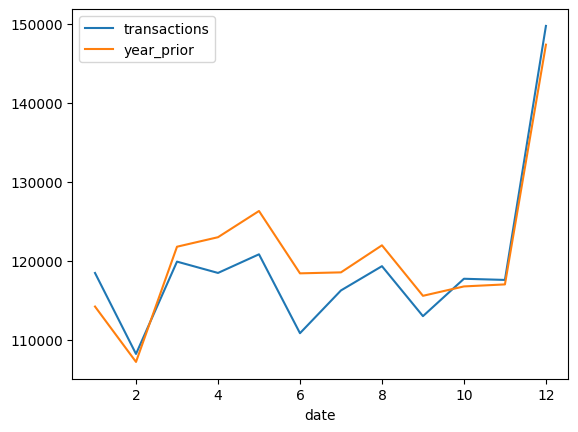

In [150]:
transactions_47_y_m.loc[2015].plot();

### Aggregating time series data with RESAMPLING

In [151]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [152]:
retail.groupby([retail['date'].dt.year, retail['date'].dt.month]).agg({'sales': 'sum'}).round(2)

sales
date date             
2016 1     23977804.89
     2     21947408.80
     3     23131780.88
     4     25963025.10
     5     24779432.26
     6     22209218.58
     7     23462672.43
     8     22452414.32
     9     22417448.10
     10    24030389.82
     11    24642640.20
     12    29640287.58
2017 1     26328159.94
     2     23250112.37
     3     26704017.69
     4     25895308.49
     5     26911847.25
     6     25682822.12
     7     27011477.57
     8     12433322.94

In [153]:
retail.set_index('date').resample('H').agg({'sales': 'sum'}).round(2)

/var/folders/z1/zt4b5v_n0yb49qxq46y1gp080000gn/T/ipykernel_1165/1168947032.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  retail.set_index('date').resample('H').agg({'sales': 'sum'}).round(2)


,sales
date,
2016-01-01 00:00:00,16433.39
2016-01-01 01:00:00,0.00
2016-01-01 02:00:00,0.00
2016-01-01 03:00:00,0.00
2016-01-01 04:00:00,0.00
...,...
2017-08-14 20:00:00,0.00
2017-08-14 21:00:00,0.00
2017-08-14 22:00:00,0.00


# Assignment 5: Resampling Time Series

Plot the monthly and yearly average oil prices.

In [154]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


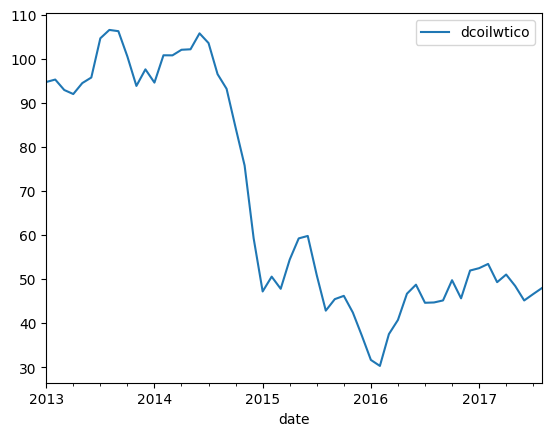

In [155]:
oil.resample('ME').mean().plot();

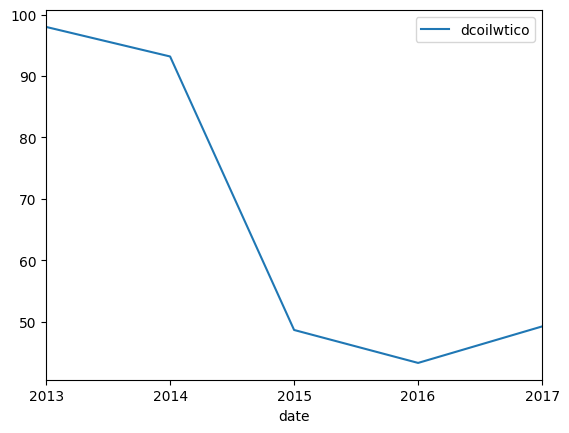

In [156]:
oil.resample('YE').mean().plot();

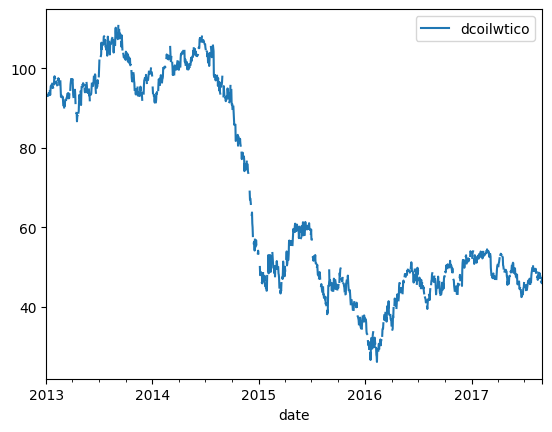

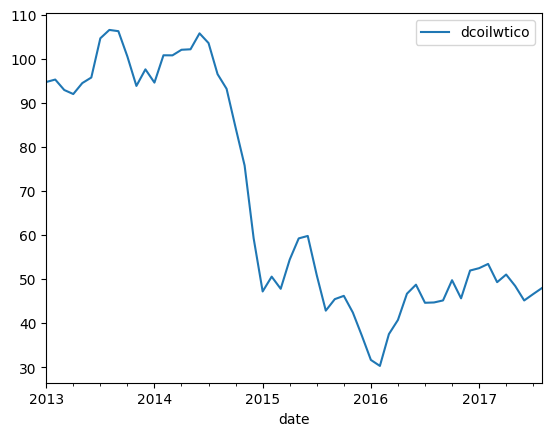

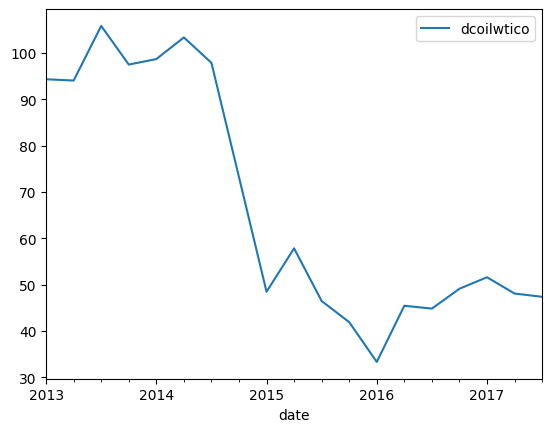

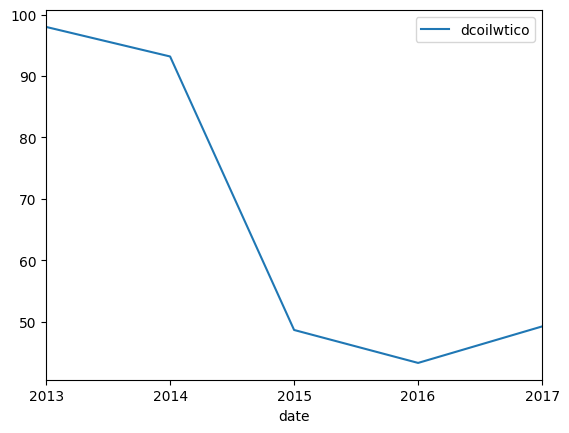

In [157]:
for period in ['D', 'ME', 'QE', 'YE']:
    oil.resample(period).mean().plot()

### Roling Averages - MÉDIAS MÓVEIS

In [159]:
retail = pd.read_csv('../retail/retail_2016_2017.csv', parse_dates=['date'])
retail.head()

,id,date,store_nbr,family,sales,onpromotion
0,1945944,2016-01-01,1,AUTOMOTIVE,0.0,0
1,1945945,2016-01-01,1,BABY CARE,0.0,0
2,1945946,2016-01-01,1,BEAUTY,0.0,0
3,1945947,2016-01-01,1,BEVERAGES,0.0,0
4,1945948,2016-01-01,1,BOOKS,0.0,0


In [161]:
retail.set_index('date').resample('YE').agg({'sales': 'sum'}).round(2)

,sales
date,
2016-12-31,2.886545e+08
2017-12-31,1.942171e+08


In [169]:
retail_dayly = retail.set_index('date').loc[:, 'sales'].resample('D').sum().round(2)
retail_dayly.head(10)

date
2016-01-01      16433.39
2016-01-02    1066677.42
2016-01-03    1226735.72
2016-01-04     955956.88
2016-01-05     835320.44
2016-01-06     821685.66
2016-01-07     653504.37
2016-01-08     713608.33
2016-01-09     989209.46
2016-01-10    1094693.84
Freq: D, Name: sales, dtype: float64

In [177]:
retail_dayly.rolling(window=2).mean()

date
2016-01-01            NaN
2016-01-02     541555.405
2016-01-03    1146706.570
2016-01-04    1091346.300
2016-01-05     895638.660
                 ...     
2017-08-11     738880.315
2017-08-12     809502.130
2017-08-13     829135.110
2017-08-14     813281.045
2017-08-15     761792.175
Freq: D, Name: sales, Length: 593, dtype: float64

<Axes: xlabel='date'>

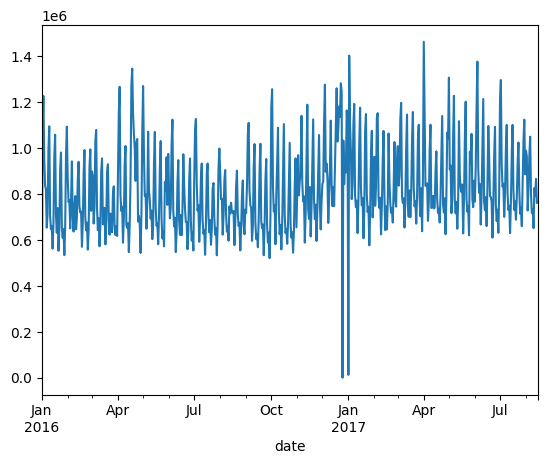

In [180]:
retail_dayly.plot()

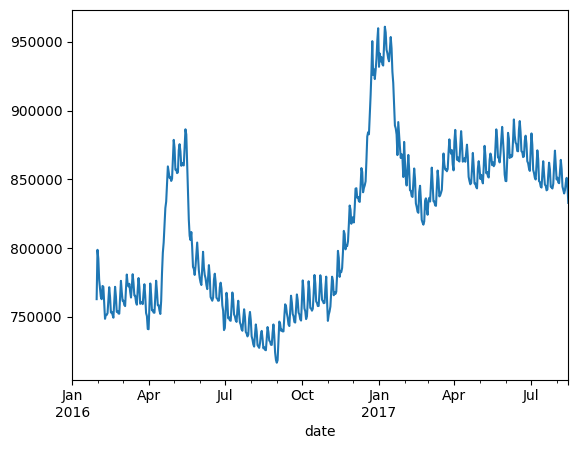

In [182]:
retail_dayly.rolling(window=30).mean().plot();

# Assignment 6: Rolling Averages

Plot the 90-day moving average for transactions for store 47.

This will help remove some of the noise from our series.

Thanks!


In [183]:
# recreate transactions_47 with date as index 

transactions_47 = (transactions
                   .loc[transactions["store_nbr"]==47, ["date", "transactions"]]
                   .set_index("date"))

transactions_47.head()

,transactions
date,
2013-01-02,4161
2013-01-03,3660
2013-01-04,3915
2013-01-05,4764
2013-01-06,4935


<Axes: xlabel='date'>

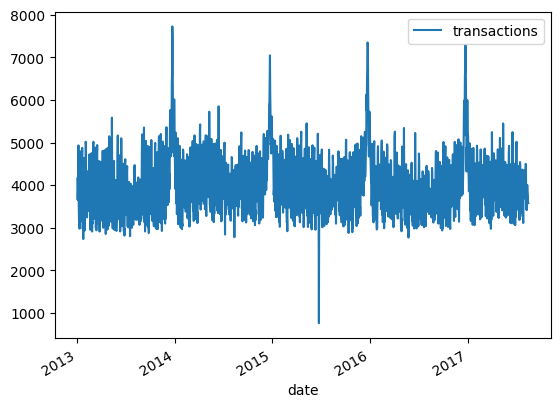

In [185]:
transactions_47.plot()

<Axes: xlabel='date'>

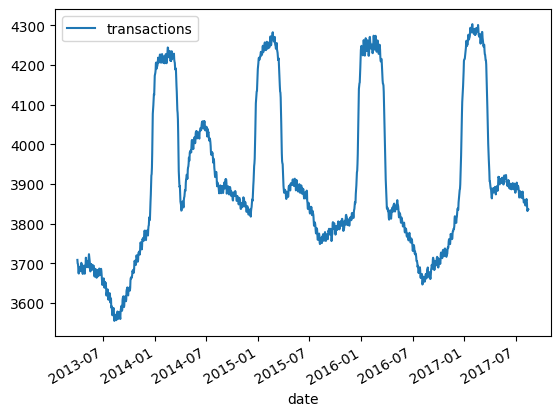

In [186]:
# original daily series for comparison

transactions_47.rolling(window=90).mean().plot()